# *Exploring the Ethics of Generative AI: Balancing Innovation and Responsibility*
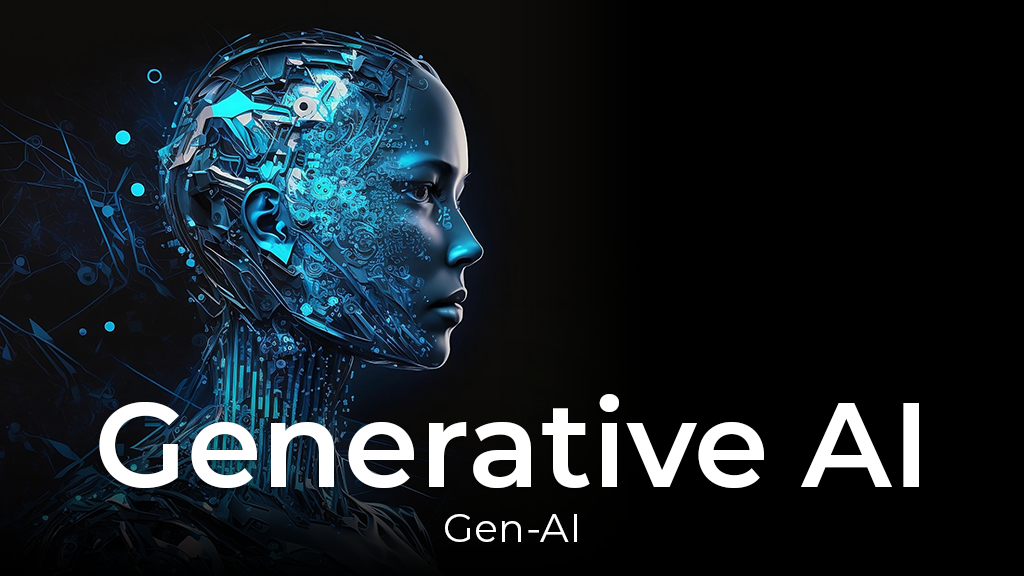





# Copyright Detection

In [11]:
from PIL import Image
import numpy as np

def calculate_similarity(img1_path, img2_path):
    img1 = Image.open(img1_path).convert('L')
    img2 = Image.open(img2_path).convert('L')
    img1 = np.array(img1.resize((256, 256)))
    img2 = np.array(img2.resize((256, 256)))

    similarity = np.mean(img1 == img2)
    return similarity

similarity_score = calculate_similarity('generated_image.jpg', 'original_image.jpg')
print(f'Similarity Score: {similarity_score}')


Similarity Score: 0.0030975341796875


# Data Anonymization Techniques

In [26]:
import re

def anonymize_text(text):
    # Replace email addresses
    text = re.sub(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b', '[EMAIL]', text)
    # Replace phone numbers
    text = re.sub(r'\b\d{10}\b', '[PHONE]', text)
    # Replace names
    text = re.sub(r'\b[A-Z][a-z]+\b', '[NAME]', text)
    return text

text = "Smriti email is smrititech012@gmail.com and her phone number is 9769673758."
anonymized_text = anonymize_text(text)
print(anonymized_text)

[NAME] email is [EMAIL] and her phone number is [PHONE].


# Balance datasets before training AI models

In [28]:
!pip install imbalanced-learn

In [43]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

data = [
    [1, 2, 0],
    [2, 3, 1],
    [3, 4, 0],
    [4, 5, 1],
    [5, 6, 0],
]

X = [d[:-1] for d in data]
y = [d[-1] for d in data]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print(f'Original dataset size: {len(X_train)}')
print(f'Resampled dataset size: {len(X_train_resampled)}')

Original dataset size: 4
Resampled dataset size: 4


# Develop Detection tools that identify Deepfakes

In [57]:
from sklearn.ensemble import RandomForestClassifier

data = [
    [1, 2, 0],
    [1, 2, 0]
]
X = [d[:-1] for d in data]
y = [d[-1] for d in data]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

accuracy = classifier.score(X_test, y_test)
print(f'Deepfake Detection Accuracy: {accuracy}')


Deepfake Detection Accuracy: 1.0


# Accountability and Transparency

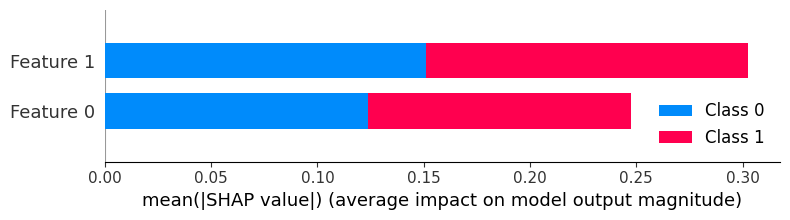

In [59]:
import shap
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

data = [
    [1, 2, 0],
    [2, 3, 1],
    [3, 4, 0],
    [4, 5, 1],
    [5, 6, 0],
]
X = [d[:-1] for d in data]
y = [d[-1] for d in data]

X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestClassifier()
model.fit(X_train, y_train)

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)
